In [ ]:
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns           

sns.set_style("whitegrid")       
plt.rcParams['figure.figsize'] = (10, 6)  

In [ ]:
# Load dataset
df = pd.read_csv("../data/crimes.csv")
df.head()

## 1. Data Overview

Below is a summary of the dataset and its features.

- **DR_NO**: Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
- **Date Rptd**: Date reported - MM/DD/YYYY.
- **DATE OCC**: Date of occurrence - MM/DD/YYYY.
- **TIME OCC**: Time of occurrence in 24-hour military time.
- **AREA NAME**: The 21 Geographic Areas or Patrol Divisions, named after a landmark or surrounding community. Example: 77th Street Division covers neighborhoods in South Los Angeles.
- **Crm Cd Desc**: Indicates the crime committed.
- **Vict Age**: Victim's age in years.
- **Vict Sex**: Victim's sex: F (Female), M (Male), X (Unknown).
- **Vict Descent**: Victim's descent categories.
- **Weapon Desc**: Description of the weapon used (if applicable).
- **Status Desc**: Crime status.
- **LOCATION**: Street address of the crime.

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


- The dataset contains 185,715 records with 12 columns.
- Missing values are present in "Vict Sex", "Vict Descent", and "Weapon Desc".

In [7]:
df.describe()

,DR_NO,TIME OCC,Vict Age
count,1.857150e+05,185715.000000,185715.000000
mean,2.255781e+08,1300.024414,39.999257
std,5.017438e+06,655.753163,15.450227
min,2.009072e+08,1.000000,2.000000
25%,2.210108e+08,830.000000,28.000000
50%,2.220114e+08,1340.000000,37.000000
75%,2.310044e+08,1830.000000,50.000000
max,2.399097e+08,2359.000000,99.000000


- The most crime-prone area is **Central**, with 14,944 cases.
- **Identity theft** is the most common crime, with 22,670 occurrences.
- **Under investigation** cases represent the majority (153,790 out of 185,715 records).
- Most victims are **male** and of **Hispanic/Latino** descent.

In [8]:
# Missing values analysis
null_percentage = (df.isnull().sum() / len(df)) * 100
null_table = pd.DataFrame({'Column': df.columns, 'Missing Percentage': null_percentage})
null_table = null_table[null_table['Missing Percentage'] > 0].sort_values(by='Missing Percentage', ascending=False)
null_table

,Column,Missing Percentage
Weapon Desc,Weapon Desc,60.422152
Vict Sex,Vict Sex,0.005923
Vict Descent,Vict Descent,0.005385


- Over 60% of records lack a weapon description. This is expected, as not all crimes involve weapons.

## 2. Data Cleaning and Transformation

In [9]:
# Convert date columns to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract time-based features
df['Year Occ'] =  df['DATE OCC'].dt.year
df['Month Occ'] = df['DATE OCC'].dt.month
df['Weekday Occ'] = df['DATE OCC'].dt.day_name()
df['Hour Occ'] = df['TIME OCC'] // 100

Now, we have additional time-based columns for further analysis.

## 3. Univariate Analysis

In [13]:
# Save directory for images
save_path = '../visuals/'

### 3.1. Victim age distribution

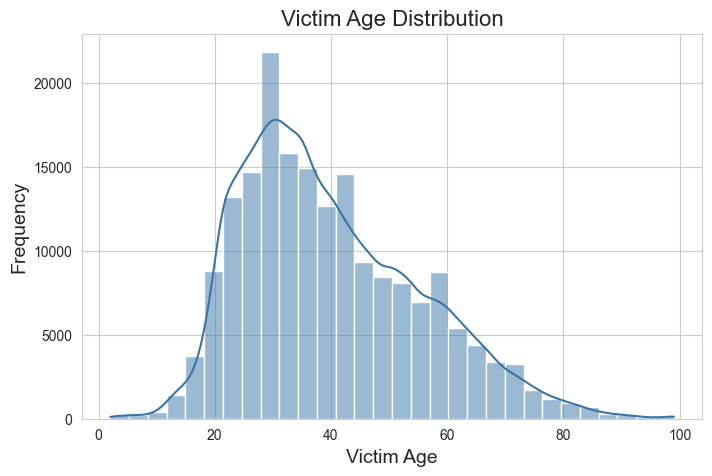

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Vict Age'], bins=30, kde=True, color='#3975a6')
plt.title("Victim Age Distribution", fontdict={'fontsize': 16})
plt.xlabel("Victim Age", fontdict={'fontsize': 14})
plt.ylabel("Frequency", fontdict={'fontsize': 14})
plt.savefig(save_path + "victim_age_distribution.png")
plt.show()

### 3.2 Top 10 most common crimes

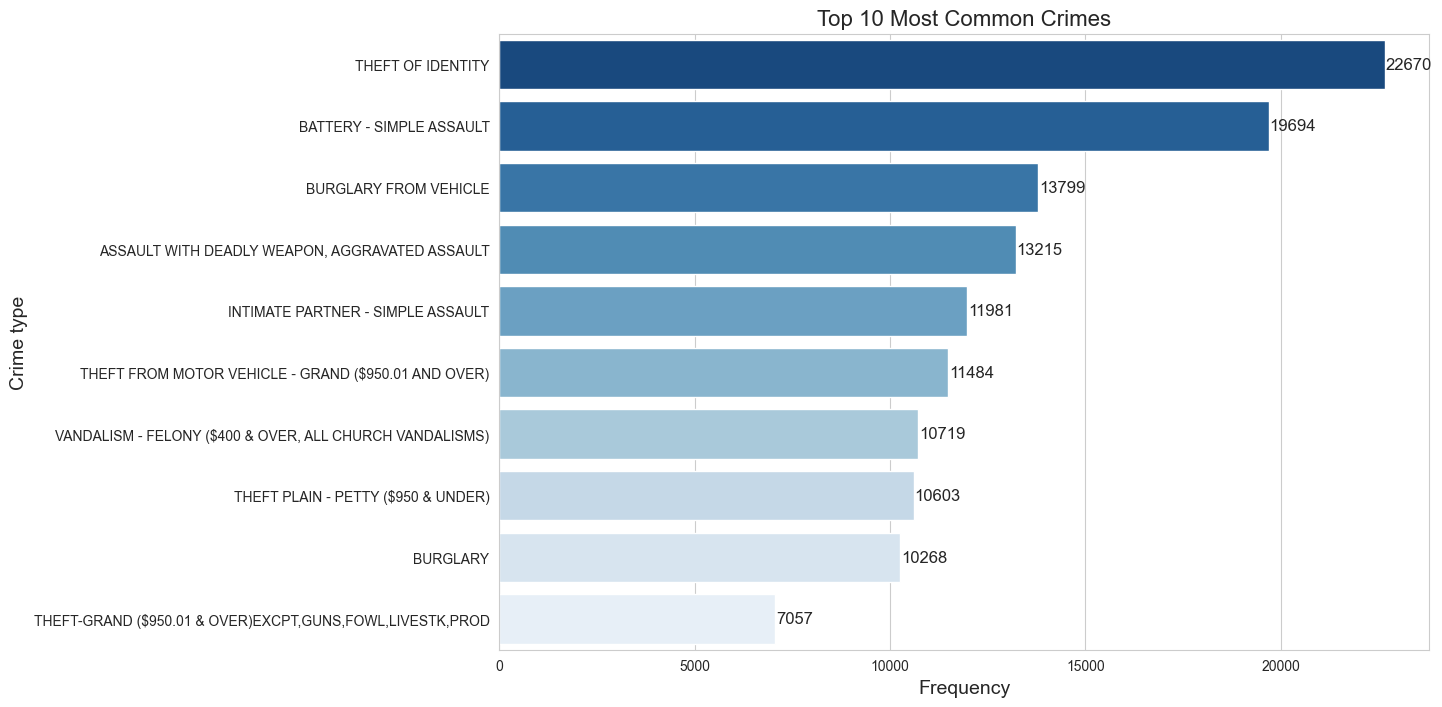

In [36]:
top_crimes = df['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='Blues_r', hue=top_crimes.index, legend=False)
plt.title("Top 10 Most Common Crimes", fontdict={'fontsize': 16})
plt.xlabel("Frequency", fontdict={'fontsize': 14})
plt.ylabel("Crime type", fontdict={'fontsize': 14})

for i, v in enumerate(top_crimes.values):
    plt.text(v + 20, i, str(v), va='center', fontsize=12)

plt.savefig(save_path + "top_crimes.png")
plt.show()

### 3.3 Crimes by weekday

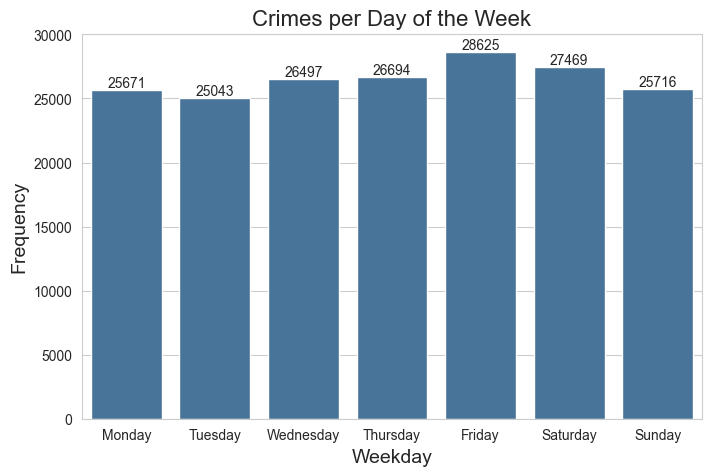

In [37]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Weekday Occ', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='#3975a6')
plt.title("Crimes per Day of the Week", fontdict={'fontsize': 16})
plt.ylabel('Frequency', fontdict={'fontsize': 14})
plt.xlabel('Weekday', fontdict={'fontsize': 14})

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.savefig(save_path + "crimes_by_weekday.png")
plt.show()